<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** Сокуров Рустам Астемирович


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
# Ваш код здесь
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier



# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
transactions_df = pd.read_csv('transactions.csv', sep=';')
transactions_df

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [3]:
gender_df = pd.read_csv('gender.csv')
gender_df

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0
...,...,...
8395,93715144,1.0
8396,51502229,0.0
8397,77655748,1.0
8398,87819773,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [4]:
transactions_df = transactions_df.groupby('user_id').agg(['sum', 'mean', 'std'])['value']
# выполняю аггрегацию, беру столбец ['value'], чтобы избавиться от мультииндекса
# Опирался на ChatGPT
# Подводка: Произведите простую агрегацию данных в таблице df при помощи pandas и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций.

#Так же добавите для каждого пользователя колонку с таргетом.

#По итогу вы должны получить таблицу с колонками:

#user_id
#value_sum
#value_mean
#value_std
#gender

In [5]:
transactions_df = transactions_df.rename(columns={'sum': 'value_sum', 'mean': 'value_mean', 'std': 'value_std'})
# переименовываю столбцы, чтобы они назывались так, как требуется в условии
# Источник: https://www.codecamp.ru/blog/pandas-rename-columns/

In [6]:
transactions_df.head()
# проверяю, что получилось

,value_sum,value_mean,value_std
user_id,,,
22899,274383.315,2143.619648,656.186785
27914,166436.523,2521.765500,415.972053
28753,251578.185,1980.930591,749.304999
31385,717856.052,2323.158744,632.491585
38084,1360028.958,2095.576206,649.030870


In [7]:
df = pd.merge(transactions_df, gender_df, on='user_id')
# объединяю два датасета в один

In [8]:
df.head()
# смотрю, что вышло - все вроде кул

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0


In [9]:
df.isnull().sum()
# в дальнейшем нельзя будет построить модель, если в данных есть пропуски
# поэтому проверяю данные на наличие пропусков

user_id        0
value_sum      0
value_mean     0
value_std     47
gender         0
dtype: int64

In [10]:
df = df.fillna(0)
# обнаружилось 47 пропусков в подсчете стандартного отклонения
# согласно документации, такое бывает, когда std берется от одного значения (в нашем случае, когда пользователь совершил одну покупку)
# по смыслу, если стд считается от одного значения, оно скорее нулевое, поэтому заменяем пропуски на нули

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [11]:
df_train_users, df_test_users = train_test_split(df['user_id'], test_size=0.2, random_state=42)
# разбиваю всех пользователей на тренировочных и тестовых

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [12]:
df_test = (df.loc[df_test_users.index]).drop('user_id', axis=1)
# получаю признаки и целевые метки тестовой выборки (для этого обращаюсь к индексам по полученным пользовательским id)
df_test.head()
# смотрю, все ли ок

,value_sum,value_mean,value_std,gender
5748,1173100.496,2121.339052,648.927367,0.0
8265,60567.872,2088.547310,699.126190,1.0
7226,344822.111,2345.728646,629.517408,0.0
5008,432202.592,2323.669849,618.171346,1.0
5382,878254.206,2131.684966,598.752898,0.0


In [13]:
df_train = (df.loc[df_train_users.index]).drop('user_id', axis=1)
# получаю признаки и целевые метки обучающей выборки (для этого обращаюсь к индексам по полученным пользовательским id)
df_train.head()
# смотрю, что получилось

,value_sum,value_mean,value_std,gender
734,966508.266,2030.479550,692.608559,1.0
196,1017783.773,1827.259916,754.389893,1.0
5744,122371.916,1942.411365,613.049411,0.0
3881,1453377.785,1707.846986,785.032099,1.0
1174,746873.903,1876.567595,701.367471,0.0


In [14]:
# осуществляю разбивку по признакам и целевым меткам обучающей и тестовой выборки
y_train = df_train['gender']
y_test = df_test['gender'] 
X_train = df_train.drop('gender', axis=1)
X_test = df_test.drop('gender', axis=1)

In [15]:
X_train.head()
# смотрю на тестовую выборку, чтобы удостовериться, что все обработалось

,value_sum,value_mean,value_std
734,966508.266,2030.479550,692.608559
196,1017783.773,1827.259916,754.389893
5744,122371.916,1942.411365,613.049411
3881,1453377.785,1707.846986,785.032099
1174,746873.903,1876.567595,701.367471


## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [16]:
model_lr = Pipeline(steps=[
    ('regression', LogisticRegression(random_state=42))
])
# задаю модель лог регрессии через пайплайн
# я и сам не знаю, зачем мне тут пайплайн, можно было, конечно, без него

In [17]:
model_lr.fit(X_train, y_train)
# обучаю модель на обучающей выборке

Pipeline(steps=[('regression', LogisticRegression(random_state=42))])

In [18]:
y_pred_lr = model_lr.predict(X_test)
probas_lr = model_lr.predict_proba(X_test)
# в переменную y_probas_lr записываю вероятности, которые выдает модель

In [19]:
probas_lr
# смотрю на эти вероятности

array([[0.5432675 , 0.4567325 ],
       [0.57058321, 0.42941679],
       [0.57098106, 0.42901894],
       ...,
       [0.5663426 , 0.4336574 ],
       [0.53286091, 0.46713909],
       [0.52319577, 0.47680423]])

In [20]:
probas_lr[:, 1]
# определяю, что это срез вероятностей первого класса

array([0.4567325 , 0.42941679, 0.42901894, ..., 0.4336574 , 0.46713909,
       0.47680423])

In [21]:
t = 0.5
# устанавливаю порог (на самом деле, не знаю, зачем, можно было просто взять predict - думал, потом понадобится, но нет)
y_pred = 1*(probas_lr >= t)
# в переменную y_pred записываю классы определнные моделью (не вероятности)
y_pred = y_pred[:, 1]
# оставляю предсказания первого класса для посчета метрик, завяисящих от порога
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [22]:
print(f'ROC_AUC этой модели равен {roc_auc_score(y_test*1, probas_lr[:, 1])}')

ROC_AUC этой модели равен 0.5739048182773048


In [23]:
print(f'accuracy этой модели равен {accuracy_score(y_test*1, y_pred)}')

accuracy этой модели равен 0.5580143540669856


In [24]:
print(f'precision этой модели равен {precision_score(y_test*1, y_pred)}')

precision этой модели равен 0.3333333333333333


In [25]:
print(f'recall этой модели равен {recall_score(y_test*1, y_pred)}')

recall этой модели равен 0.0013550135501355014


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ модель получилась полное г****. Она ничего нормально не предсказывает. 
<ol>
    <li> ROC_AUC равен  0.57 - модель предсказывает чуть лучше, чем рандомный предсказатель
    <li> Accuracy модели 0.56 - что тоже говорит о том, что модель уже очень часто ошибается и ее предсказания практически случайные
    <li> Данные по реколл и пресижн говорят о том, что модель практически не распознает первый класс, а те немноги, что распознает - в 6 из 10 случаев ошибается
</ol>
Возможно, дело в том, что входные параметры практически рандомные и на самом деле по ним практически невозможно угадать, какого гендера покупатель (имеется в виду та агрегация данных, что мы сделали), а возможно дело в том, что надо было поиграться с гиперпараметрами. Забегая вперед, дело именно в признаках, которые по сути практически никак не оценивают переменную. Очевидным этот станет в следующем пункте, где используются другие метки

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [26]:
transactions_df = pd.read_csv('transactions.csv', sep=';')
# Подгружаю датасет

In [27]:
df_pivot = pd.pivot_table(transactions_df, index='user_id', columns='type', values='value', aggfunc='sum', fill_value=0)
# создаю сводную таблицу
# Источник: моя прошлая домашка
df_pivot.head()
#проверяю, что получил (то ли)

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [28]:
df = pd.merge(df_pivot, gender_df, on='user_id')
# соединяю получившуюся сводную таблицу и датасет в гендарами в одну тадлицу
df=df.drop('user_id', axis=1)
# убираю столбец 'user_id' за нанадобностью в подготовке данных для модели

In [29]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=47)
# разбиваю данные на тестовые и обучающие
y_train = df_train['gender']
y_test = df_test['gender'] 
X_train = df_train.drop('gender', axis=1)
X_test = df_test.drop('gender', axis=1)
# разделяю данные на параметры и целевые метки для обучающей и тестовой выборки

In [30]:
model_lr.fit(X_train, y_train)
# уже заданную модель обучаю на новых данных (модель была задана в прошлом пункте)
probas_lr = model_lr.predict_proba(X_test)
# в перемнную probas_lr выгружаю вероятности классов, посчитанные моделью

In [31]:
t = 0.5
y_pred = 1*(probas_lr >= t)
y_pred = y_pred[:, 1]
y_pred
# делаю то же, что и в прошлом пункте - в перемнной y_pred -  классификации первого и второго класса с порогом t = 0.5
# Источник: гитхаб с семов

array([1, 0, 0, ..., 0, 1, 0])

In [32]:
print(f'ROC_AUC новой модели - {roc_auc_score(y_test*1, probas_lr[:, 1])}')

ROC_AUC новой модели - 0.7929812698135706


In [33]:
sum((probas_lr[:, 1] == probas_lr[:, -1])*1)

1672

In [34]:
len(probas_lr[:, 1])

1672

In [35]:
print(f'Accuracy новой модели - {accuracy_score(y_test*1, y_pred)}')

Accuracy новой модели - 0.7194976076555024


In [36]:
print(f'Precision новой модели - {precision_score(y_test*1, y_pred)}')

Precision новой модели - 0.697428139183056


In [37]:
print(f'Recall новой модели - {recall_score(y_test*1, y_pred)}')

Recall новой модели - 0.6315068493150685


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод: Качество модели значительно изменилось. Если в предыдщем пункте мы получали значения recall и precision почти равные 0, то тут они не просто больше, но и достаточно хорошие: recall = 0,63, precision = 0,69. Такая же положительная тенденция заметна и с метриками accuracy и roc_auc. Если в прошлом пункте они были худшие - все равно, что модель выдавала рандомные результаты, то теперь они достаточно хорошие. В 71% случаев модель распознает класс верно.__

__Это происходит по причине улучшения качества параметров, по которым учится модель. Возвращаясь к выводам прошлого пункта, опять же, можно сказать, что в прошлой задаче и сами параметры были полурандомными и по ним едва ли можно было определить какой гендер. Тут же другое дело.__

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [38]:
columns_name = df.columns
# на всякий случай сохраняю в переменную columns_name названия колонок 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# нормирую признаки обучающей выборк
X_test_scaled = scaler.transform(X_test)
# нормирую признакие тренировочной выборки

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [39]:
# для начала подбираю метод оптимизации
solvers =  ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
# в переменной солверс обозначаю методы оптимизации, которые буду перебирать

searcher_lr = GridSearchCV(model_lr, [{"regression__solver": solvers}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
#задаю серчер
searcher_lr.fit(X_train_scaled, y_train)
# передаю серчеру признаки
best_solver = searcher_lr.best_params_["regression__solver"]
#сохраняю лучший солвер в перемнную best_solver
best_solver
# с пониманием структуры кода помог чт же пи те
# подводка: Подберите наилучшие параметры для модели линейной регрессии, действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

'saga'

In [40]:
# gодбираю остальные гиперпараметры для модели (выбираю те параметры, где значения не просто булевы значения, или возможных значений хотябы больше двух)
params = {'regression__penalty': ['l1', 'l2', 'elasticnet'],
              'regression__C': [0.001, 0.01, 0.1, 1, 10],
              'regression__l1_ratio': np.arange(0.0, 1.1, 0.1)}
# заново задаю лог регрессию с известным солвером
model_lr = Pipeline(steps=[
    ('regression', LogisticRegression(solver='saga', random_state=42))
])

searcher_lr = GridSearchCV(model_lr, params,
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr.fit(X_train_scaled, y_train)

best_ = searcher_lr.best_params_
best_
# в формировании кода и определении параметров для перебора помог ChatGPT
# Подводка: Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:
#используйте перебор по сетке
#в качестве метрики используйте ROC AUC
#для оценки параметров делайте кросс-валидацию на 4 фолдах
#solver в модели регрессии равен 'saga'

{'regression__C': 0.01,
 'regression__l1_ratio': 0.2,
 'regression__penalty': 'elasticnet'}

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [41]:
# еще раз задаю логистическую регрессию уже с подобранными оптимальными параметрами
model_lr = Pipeline(steps=[    ('regression', LogisticRegression(solver='saga', C=0.01, penalty='elasticnet', l1_ratio=0.2, random_state=42))])
model_lr.fit(X_train_scaled, y_train)
# обучаю модель
probas_lr = model_lr.predict_proba(X_test_scaled)
# помещаю в переменную probas_lr 

In [42]:
t = 0.5
y_pred = 1*(probas_lr >= t)
y_pred = y_pred[:, 1]
y_pred
# источник: тетрадь гитхаба
# делаю то же, что и в прошлом пункте - в перемнной y_pred -  классификации первого и второго класса с порогом t = 0.5

array([1, 0, 0, ..., 0, 1, 0])

In [43]:
first_model_result = roc_auc_score(y_test*1, probas_lr[:, 1])
# сохраняю рок-аук полученной модели в переменную first_model_result, чтобы потом использовать в 4 части
print(f'Рок-аук получился равен {first_model_result}')

Рок-аук получился равен 0.808757234679929


In [44]:
print(f'Accuracy = {accuracy_score(y_test*1, y_pred)}')

Accuracy = 0.7194976076555024


In [45]:
print(f'Precision = {precision_score(y_test*1, y_pred)}')

Precision = 0.8070588235294117


In [46]:
print(f'Recall = {recall_score(y_test*1, y_pred)}')

Recall = 0.46986301369863015


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: отвечая на вопрос о том, получилось ли добиться лучшего качества модели ответ неоднозначный. С одной стороны, вроде бы да, так как roc_auc_score, на котором училась модель, стал больше, precision_score также стал значительно лучше, однако recall_score сильно ухудшился: с 0,6 он понизился до примерно до 0,47. Таким образом, прибавив в roc_auc_score 1/100, мы потеряли в полноте ,более 1/10. В связи с эти модель стала более подходящей для одниx задач и менее подходящей для других задач. Например, для задач автоматического одобрения кредита, данная модель стала бы более подходящей, так как в ней precision более значим. В то же время модель стала мене применимой для медицины, потому что в ней важен recall, который сильно уменьшился

Кросс-валидацию в данном случае в основном служит для корректногоьподбора параметров, а именно, чтобы была возможность проверить параметр, посчитав его рок-аук и сравнив с рок-ауками других параметров, таким образом, выбрав наилучший параметр. Так, кросс-валидация одновременно и решает проблему переобучения, отсеивая параметры с низким roc_auc. Тестовая выборка же не допускает возникновение переобучения для целой модели с уже готовыми параметрами.

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [47]:
t = np.arange(0, 1.01, 0.01)
# задаю список порогов, по которым будет осуществляться перебор
betas = [] # в этот список будут складываться все полученные ф-меры
def beta_5(recall, precision): #создаю функцию, которая будет счиать F-mehe c беттой равной 5
    return ((1 + 5 ** 2) * precision * recall) / (5 ** 2 * precision + recall) # тут формула с семов
for k in t: # цикл считает сначала рекол, потом пресиж, в конце считая и сохраняя бету для каждого порога
    y_pred = 1*(probas_lr >= k)
    y_pred = y_pred[:, 1] # в этом спике разбиение по классам
    recall = recall_score(y_test*1, y_pred) # подсчет рекол
    precision = precision_score(y_test*1, y_pred) # подсчет пресижн
    betas.append(beta_5(recall, precision))
print(f'Порог при котором Бетта максимальна: {t[betas.index(max(betas))]}')
print(max(betas))
# тут мне помог чат жпт: у него позаимствовал идею создания функции и цикла
# Запрос: Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

#Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

#Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.


Порог при котором Бетта максимальна: 0.0
0.9527155908041361


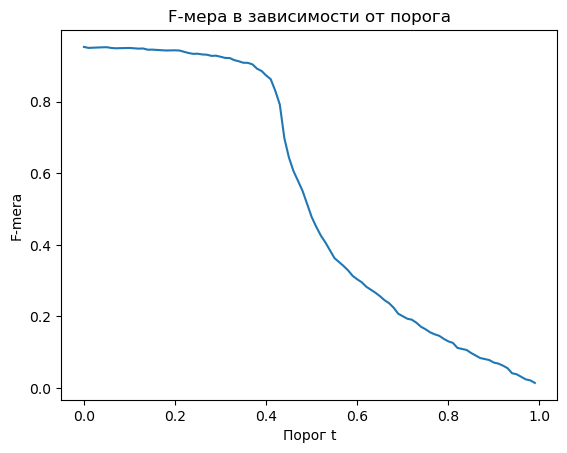

In [48]:
# тут рисую иллюстрацию
plt.plot(t, betas)
plt.xlabel("Порог t")
plt.ylabel("F-mera")
plt.title('F-мера в зависимости от порога');

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [49]:
coef = model_lr.steps[-1][1].coef_
# тут сохраняю все коэффициенты модели
coef[0][:20]

array([ 1.59565586e-02, -8.52261829e-03,  0.00000000e+00,  4.83415963e-01,
        3.82729699e-03,  6.07515793e-02,  3.01893253e-02, -3.86529575e-04,
        1.56137423e-02, -9.62290961e-04, -1.62135325e-01, -2.88292534e-01,
       -7.90172375e-03,  8.08029271e-02,  9.96640488e-02,  0.00000000e+00,
        5.45072309e-02,  8.51486848e-03, -1.52103680e-02,  0.00000000e+00])

In [50]:
# в переменную positive_futures сохраняю характеристики с коэффициентами, которые увеличивают результат модели, то есть
# приближают ее к классу 1. Это те характеристики, у которых итоговый коэффициент > 0
positive_features = [columns_name[i] for i in range(len(coef[0])) if coef[0][i] > 0]
# сюда сохраняю названия характеристик
positive_meanings = [coef[0][i] for i in range(len(coef[0])) if coef[0][i] > 0]
# сюда сохраняю их коэффициенты
positive_features
#помог чат жпт (подсказал с идеей разбиения на положительные и отрицательные коэффициенты)
# подводка: Для логистической регрессии получите список признаков, которые увеличивают вероятность метки 0. Аналогично для метки 1.

['Авиалинии, авиакомпании',
 'Автозапчасти и аксессуары',
 'Автоматизированные бензозаправки',
 'Автомойки',
 'Автошины',
 'Агентства по аренде автомобилей',
 'Бакалейные магазины, супермаркеты',
 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков',
 'Бизнес-сервис',
 'Билльярд-клубы',
 'Веломагазины — продажа и обслуживание',
 'Видеопрокат',
 'Галереи/учреждения видеоигр',
 'Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу',
 'Горючее топливо — уголь, нефть, разжиженный бензин, дрова',
 'Денежные переводы MasterCard MoneySend',
 'Детская одежда, включая одежду для самых маленьких',
 'Жилье — отели, мотели, курорты',
 'Кабельные и другие платные телевизионные услуги',
 'Канцелярия, офисные сопутствующие товары, бумага для печатания и письма',
 'Кинотеатры',
 'Компьютерная сеть/информационные услуги',
 'Компьютеры, периферийное компьютерное оборудование, программное обеспечение',
 'Легковой и грузовой транспорт — продажа, серв

In [51]:
negative_features = [columns_name[i] for i in range(len(coef[0])) if coef[0][i] < 0]
negative_meanings = [coef[0][i] for i in range(len(coef[0])) if coef[0][i] < 0]
negative_features
# то же самое для отрицательных кэфов

['Авиалинии, авиакомпании, нигде более не классифицированные',
 'Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка',
 'Агенты и менеджеры по аренде недвижимости',
 'Аксессуары для женщин',
 'Аптеки',
 'Ассоциации — гражданские, социальные и братские',
 'Больницы',
 'Ветеринарные услуги',
 'Готовая женская одежда',
 'Дантисты, ортодонтисты',
 'Денежные переводы',
 'Звонки с использованием телефонов, считывающих магнитную ленту',
 'Зоомагазины',
 'Изготовление и продажа меховых изделий',
 'Кондитерские',
 'Лекарства, их распространители, аптеки',
 'Магазины игрушек',
 'Магазины косметики',
 'Магазины мужской и женской одежды',
 'Магазины офисных, школьных принадлежностей, канцтоваров',
 'Магазины по продаже часов, ювелирных изделий и изделий из серебра',
 'Магазины ткани, ниток рукоделия, шитья',
 'Магазины, торгующие по сниженным ценам',
 'Нефть и нефтепродукты',
 'Образовательные услуги',
 'Обувные магазины',


In [52]:
female_features_df = pd.DataFrame({'feature':negative_features, 'meaning': negative_meanings})
female_features_df.sort_values(by='meaning')
# объединяю характеристики и и их коэффициенты в один датасет, сортирую

,feature,meaning
17,Магазины косметики,-0.459892
8,Готовая женская одежда,-0.363662
18,Магазины мужской и женской одежды,-0.309438
4,Аптеки,-0.288293
26,Одежда для всей семьи,-0.267524
31,Различные магазины одежды и аксессуаров,-0.224882
11,"Звонки с использованием телефонов, считывающих...",-0.193434
33,"Ткани, обивочный материал, гардины и портьеры,...",-0.162287
3,Аксессуары для женщин,-0.162135
19,"Магазины офисных, школьных принадлежностей, ка...",-0.092260


In [53]:
male_features_df = pd.DataFrame({'feature':positive_features, 'meaning': positive_meanings})
male_features_df.sort_values(by='meaning').iloc[:20]
# объединяю характеристики и и их коэффициенты в один датасет, сортирую

,feature,meaning
52,Прямой маркетинг — торговые точки подписки,0.000563
36,Паркинги и гаражи,0.001053
19,"Канцелярия, офисные сопутствующие товары, бума...",0.001361
16,"Детская одежда, включая одежду для самых мален...",0.001547
34,Оптовики,0.001896
25,"Луна-парки, карнавалы, цирки, предсказатели бу...",0.002474
11,Видеопрокат,0.003022
2,Автоматизированные бензозаправки,0.003827
35,"Офисное, фотографическое, фотокопировальное, и...",0.004639
71,Фотостудии,0.005067


# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [54]:
len(df.columns)

185

Возможно, данную задачу классификации лучшим образом будет решать модель рандомного леса

In [55]:
# задаю модель рандомного леса
model_rf = RandomForestClassifier(random_state=47)  
model_rf.fit(X_train_scaled, y_train)


p_pred = model_rf.predict_proba(X_test_scaled) # сохраняю вероятности модели
roc_auc = roc_auc_score(y_test, p_pred[:, -1]) # считаю рок-аук
print("ROC AUC:", roc_auc)
# Источник: тетрадь с семов

ROC AUC: 0.8230731756972922


In [56]:
print(f'Результат работы рандомного леса оказалася лучше, чем результат работы логистической регрессии. Напомню, она выбивала {first_model_result} на ROC-AUC. Разница составляет {roc_auc-first_model_result}')

Результат работы рандомного леса оказалася лучше, чем результат работы логистической регрессии. Напомню, она выбивала 0.808757234679929 на ROC-AUC. Разница составляет 0.01431594101736322


In [57]:
print('Попробуем подобрать параметры для рандомного леса, чтобы он выдавал результаты лучше')

Попробуем подобрать параметры для рандомного леса, чтобы он выдавал результаты лучше


In [58]:
# еще раз задаю модель рандомного леса
rfc = RandomForestClassifier(random_state=42) # было 42

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# в переменных заключаю значеняия параметров, которые будут перебираться
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
# для удобства формирую словарь
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100,
                        scoring="roc_auc",
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=42)
rs.fit(X_train_scaled, y_train)
# обучаю модель
rs.best_params_
# вывожу лучшие параметры
# Источник: https://habr.com/ru/companies/ruvds/articles/488342/

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 9,
 'bootstrap': True}

In [60]:
# задаю модель рандомного леса с подобранными лучшими параметрами
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=12, min_samples_leaf=2, max_features= 'log2', max_depth=9, bootstrap=True, random_state=42) # было 42
rfc.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=12, n_estimators=400, random_state=42)

In [61]:
probas_rfc = rfc.predict_proba(X_test_scaled)
probas_rfc # записываю вероятности, предсказанные моделью

array([[0.50345004, 0.49654996],
       [0.62039108, 0.37960892],
       [0.58140634, 0.41859366],
       ...,
       [0.55756244, 0.44243756],
       [0.40450138, 0.59549862],
       [0.66869408, 0.33130592]])

In [62]:
roc_auc_score(y_test, probas_rfc[:,-1]) # считаю рок-аук

0.8470021522263909

In [63]:
print(f'Подобрав гиперпараметры, мы смогли улучшеть результат предсказания на {roc_auc_score(y_test, probas_rfc[:,-1]) - first_model_result}, что на самом деле прям круто и очень значительно')

Подобрав гиперпараметры, мы смогли улучшеть результат предсказания на 0.038244917546461865, что на самом деле прям круто и очень значительно


Создадим бэггинг ансамбль, чтобы улучшить полученные результаты

In [64]:

base_model = rfc


bagging_model = BaggingClassifier(base_model, n_estimators=30, random_state=101, n_jobs=-1) 


bagging_model.fit(X_train, y_train)


probabilities = bagging_model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, probabilities)
print("ROC AUC:", roc_auc)
# Источник: https://www.helenkapatsa.ru/beghghingh/
# Источник 2: ChatGPT: помог понять структуру

ROC AUC: 0.8481051682517523


In [65]:
print(f'Круто! Результат опять улучшился! Отрыв от первоначальной модели теперь составляет {roc_auc-first_model_result}. Попробуем бустинг, может быть, он покажет еще лучшие результаты')

Круто! Результат опять улучшился! Отрыв от первоначальной модели теперь составляет 0.03934793357182331. Попробуем бустинг, может быть, он покажет еще лучшие результаты


In [66]:

# Инициализируем базовую модель (в данном случае DecisionTreeClassifier)
base_model = rfc

# Инициализируем модель бустинга с использованием AdaBoostClassifier
boosting_model = AdaBoostClassifier(base_model, n_estimators=30, random_state=101) 

# Обучаем модель бустинга на обучающих данных
boosting_model.fit(X_train, y_train)

# Получаем вероятности принадлежности к классу 1 для тестовых данных
probabilities = boosting_model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC AUC
roc_auc = roc_auc_score(y_test, probabilities)
print("ROC AUC:", roc_auc)
# Источник: ChatGPT
# Подводка: Исправь код так (выше), чтобы он использовал бустинг, а не беггинг

ROC AUC: 0.8559506151295698


In [67]:
print(f'И да, действительно, он показал более значемые результаты, увеличив отрыв от начального результата на {roc_auc-first_model_result}')

И да, действительно, он показал более значемые результаты, увеличив отрыв от начального результата на 0.04719338044964083
